# Data Preprocessing

## Data cleaning
### Data will be imported first

In [192]:
import pandas as pd

# Read the dataset
dataset_path = "C:\My\Top-up Degree\Data Science\Data Science - Assignment\Data set\Kaggle\Our World in Data - COVID-19\owid-covid-data.csv"
data = pd.read_csv(dataset_path)
print("Shape before dropping columns:", data.shape)
display(data.head(n=5))

Shape before dropping columns: (330782, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN


### Checking for missing values and fixing it

In [184]:
# Import pandas as pd
import pandas as pd

# Import display from IPython.display
from IPython.display import display

# Calculate the missing data ratio for each column as percentages
missing_data_ratio = data.isnull().mean() * 100

# Convert the Series to a DataFrame for better display
missing_data_df = pd.DataFrame({'Missing Data Ratio (%)': missing_data_ratio})

# Display the missing data ratio for each column as percentages in a scrollable DataFrame
with pd.option_context('display.max_rows', None):
    display(missing_data_df)

,Missing Data Ratio (%)
iso_code,0.00
continent,4.75
location,0.00
date,0.00
total_cases,11.33
new_cases,2.77
new_cases_smoothed,3.15
total_deaths,17.72
new_deaths,2.75
new_deaths_smoothed,3.12


In [185]:
# Calculate the missing data ratio for each column as percentages
missing_data_ratio = data.isnull().mean() * 100

# Convert the Series to a DataFrame for better display
missing_data_df = pd.DataFrame({'Missing Data Ratio (%)': missing_data_ratio})

# Display the missing data ratio for each column as percentages in a scrollable DataFrame
# with pd.option_context('display.max_rows', None):
#     print(missing_data_df)
print(missing_data_df)

                                         Missing Data Ratio (%)
iso_code                                                   0.00
continent                                                  4.75
location                                                   0.00
date                                                       0.00
total_cases                                               11.33
...                                                         ...
population                                                 0.00
excess_mortality_cumulative_absolute                      96.51
excess_mortality_cumulative                               96.51
excess_mortality                                          96.51
excess_mortality_cumulative_per_million                   96.51

[67 rows x 1 columns]


In [186]:
# Calculate the threshold for dropping columns
threshold = len(data) * 0.5

# Calculate the missing data ratio for each column
missing_data_ratio = data.isnull().mean() * 100

# Drop columns with over 50% missing values
dropped_columns = data.columns[missing_data_ratio > 50]
data = data.drop(dropped_columns, axis=1)

# Print the dropped columns along with their missing data ratio
print("Dropped Columns and Their Missing Data Ratio (%):")
print(missing_data_ratio[dropped_columns])

Dropped Columns and Their Missing Data Ratio (%):
icu_patients                               88.80
icu_patients_per_million                   88.80
hosp_patients                              88.50
hosp_patients_per_million                  88.50
weekly_icu_admissions                      97.01
weekly_icu_admissions_per_million          97.01
weekly_hosp_admissions                     93.15
weekly_hosp_admissions_per_million         93.15
total_tests                                76.00
new_tests                                  77.20
total_tests_per_thousand                   76.00
new_tests_per_thousand                     77.20
new_tests_smoothed                         68.57
new_tests_smoothed_per_thousand            68.57
positive_rate                              71.00
tests_per_case                             71.48
tests_units                                67.72
total_vaccinations                         76.59
people_vaccinated                          77.59
people_fully_vaccin

In [170]:
data.dtypes

iso_code                                       object
continent                                      object
location                                       object
date                                           object
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
reproduction_rate                             float64
new_vaccinations_smoothed                     float64
new_vaccinations_smoothed_pe

In [171]:
data['date'] = pd.to_datetime(data['date'])
data['iso_code'] = data['iso_code'].astype('category')
data['continent'] = data['continent'].astype('category')
data['location'] = data['location'].astype('category')

In [172]:
data.dtypes

iso_code                                            category
continent                                           category
location                                            category
date                                          datetime64[ns]
total_cases                                          float64
new_cases                                            float64
new_cases_smoothed                                   float64
total_deaths                                         float64
new_deaths                                           float64
new_deaths_smoothed                                  float64
total_cases_per_million                              float64
new_cases_per_million                                float64
new_cases_smoothed_per_million                       float64
total_deaths_per_million                             float64
new_deaths_per_million                               float64
new_deaths_smoothed_per_million                      float64
reproduction_rate       

In [173]:
# Check for duplicates based on 'location' and 'date'
duplicates = data[data.duplicated(['location', 'date'], keep=False)]

# Display the duplicate rows (if any)
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [174]:
data.dtypes

iso_code                                            category
continent                                           category
location                                            category
date                                          datetime64[ns]
total_cases                                          float64
new_cases                                            float64
new_cases_smoothed                                   float64
total_deaths                                         float64
new_deaths                                           float64
new_deaths_smoothed                                  float64
total_cases_per_million                              float64
new_cases_per_million                                float64
new_cases_smoothed_per_million                       float64
total_deaths_per_million                             float64
new_deaths_per_million                               float64
new_deaths_smoothed_per_million                      float64
reproduction_rate       

# Imputation

In [180]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming 'country_data' is the DataFrame with float columns and missing values
# Select only the float columns
float_columns = data.select_dtypes(include='float')

# Create a SimpleImputer object with the strategy of most frequent
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the float columns using the imputer
country_data_imputed = pd.DataFrame(imputer.fit_transform(float_columns), columns=float_columns.columns)

# Fill missing values in the non-float columns with the previous values
country_data_imputed = country_data_imputed.fillna(method='ffill')

# Merge the non-float columns with the imputed float columns
country_data_imputed = data.select_dtypes(exclude='float64').merge(country_data_imputed, left_index=True, right_index=True)

print("Missing values after imputation:")
print(country_data_imputed.isnull().sum())

Missing values after imputation:
iso_code                                          0
continent                                     15723
location                                          0
date                                              0
total_cases                                       0
new_cases                                         0
new_cases_smoothed                                0
total_deaths                                      0
new_deaths                                        0
new_deaths_smoothed                               0
total_cases_per_million                           0
new_cases_per_million                             0
new_cases_smoothed_per_million                    0
total_deaths_per_million                          0
new_deaths_per_million                            0
new_deaths_smoothed_per_million                   0
reproduction_rate                                 0
new_vaccinations_smoothed                         0
new_vaccinations_smoothed_per_m

C:\Users\ziyan\AppData\Local\Temp\ipykernel_6668\1467248968.py:17: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_before = data_without_population.mean()
C:\Users\ziyan\AppData\Local\Temp\ipykernel_6668\1467248968.py:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_before = data_without_population.mean()
C:\Users\ziyan\AppData\Local\Temp\ipykernel_6668\1467248968.py:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_after = country_data_imputed_without_population.mean()
C:\Users\ziyan\AppData\Local\Temp\ipykernel_6668\1467248968.py:20: FutureWarnin

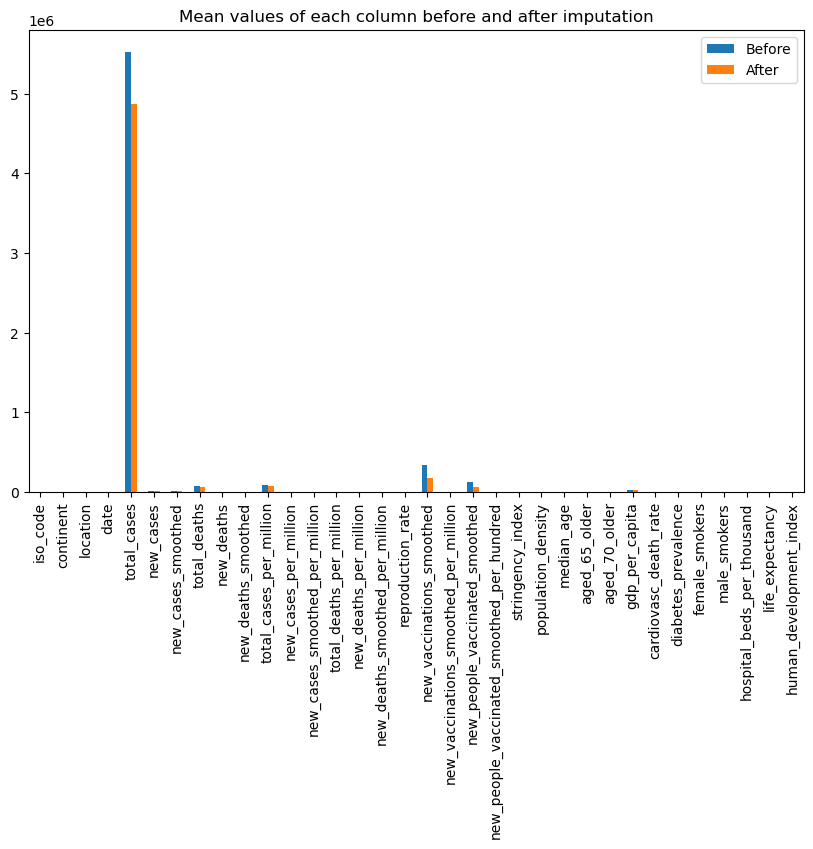

In [103]:
# Import pandas as pd
import pandas as pd

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assuming 'data' and 'country_data_imputed' are DataFrames with the population column
# Remove the 'population' column before calculating the mean values

# Remove 'population' column from 'data'
data_without_population = data.drop(columns=['population'])

# Remove 'population' column from 'country_data_imputed'
country_data_imputed_without_population = country_data_imputed.drop(columns=['population'])

# Calculate the mean values of each column before imputation (excluding 'population')
mean_before = data_without_population.mean()

# Calculate the mean values of each column after imputation (excluding 'population')
mean_after = country_data_imputed_without_population.mean()

# Create a DataFrame with the mean values and the column names
mean_df = pd.DataFrame({'Before': mean_before, 'After': mean_after}, index=data_without_population.columns)

# Plot the DataFrame as a bar plot
mean_df.plot(kind='bar', figsize=(10, 6), title='Mean values of each column before and after imputation')
plt.show()

C:\Users\ziyan\anaconda3\lib\site-packages\missingno\missingno.py:264: RuntimeWarning: overflow encountered in long_scalars
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)
C:\Users\ziyan\anaconda3\lib\site-packages\missingno\missingno.py:271: RuntimeWarning: overflow encountered in long_scalars
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<Axes: >

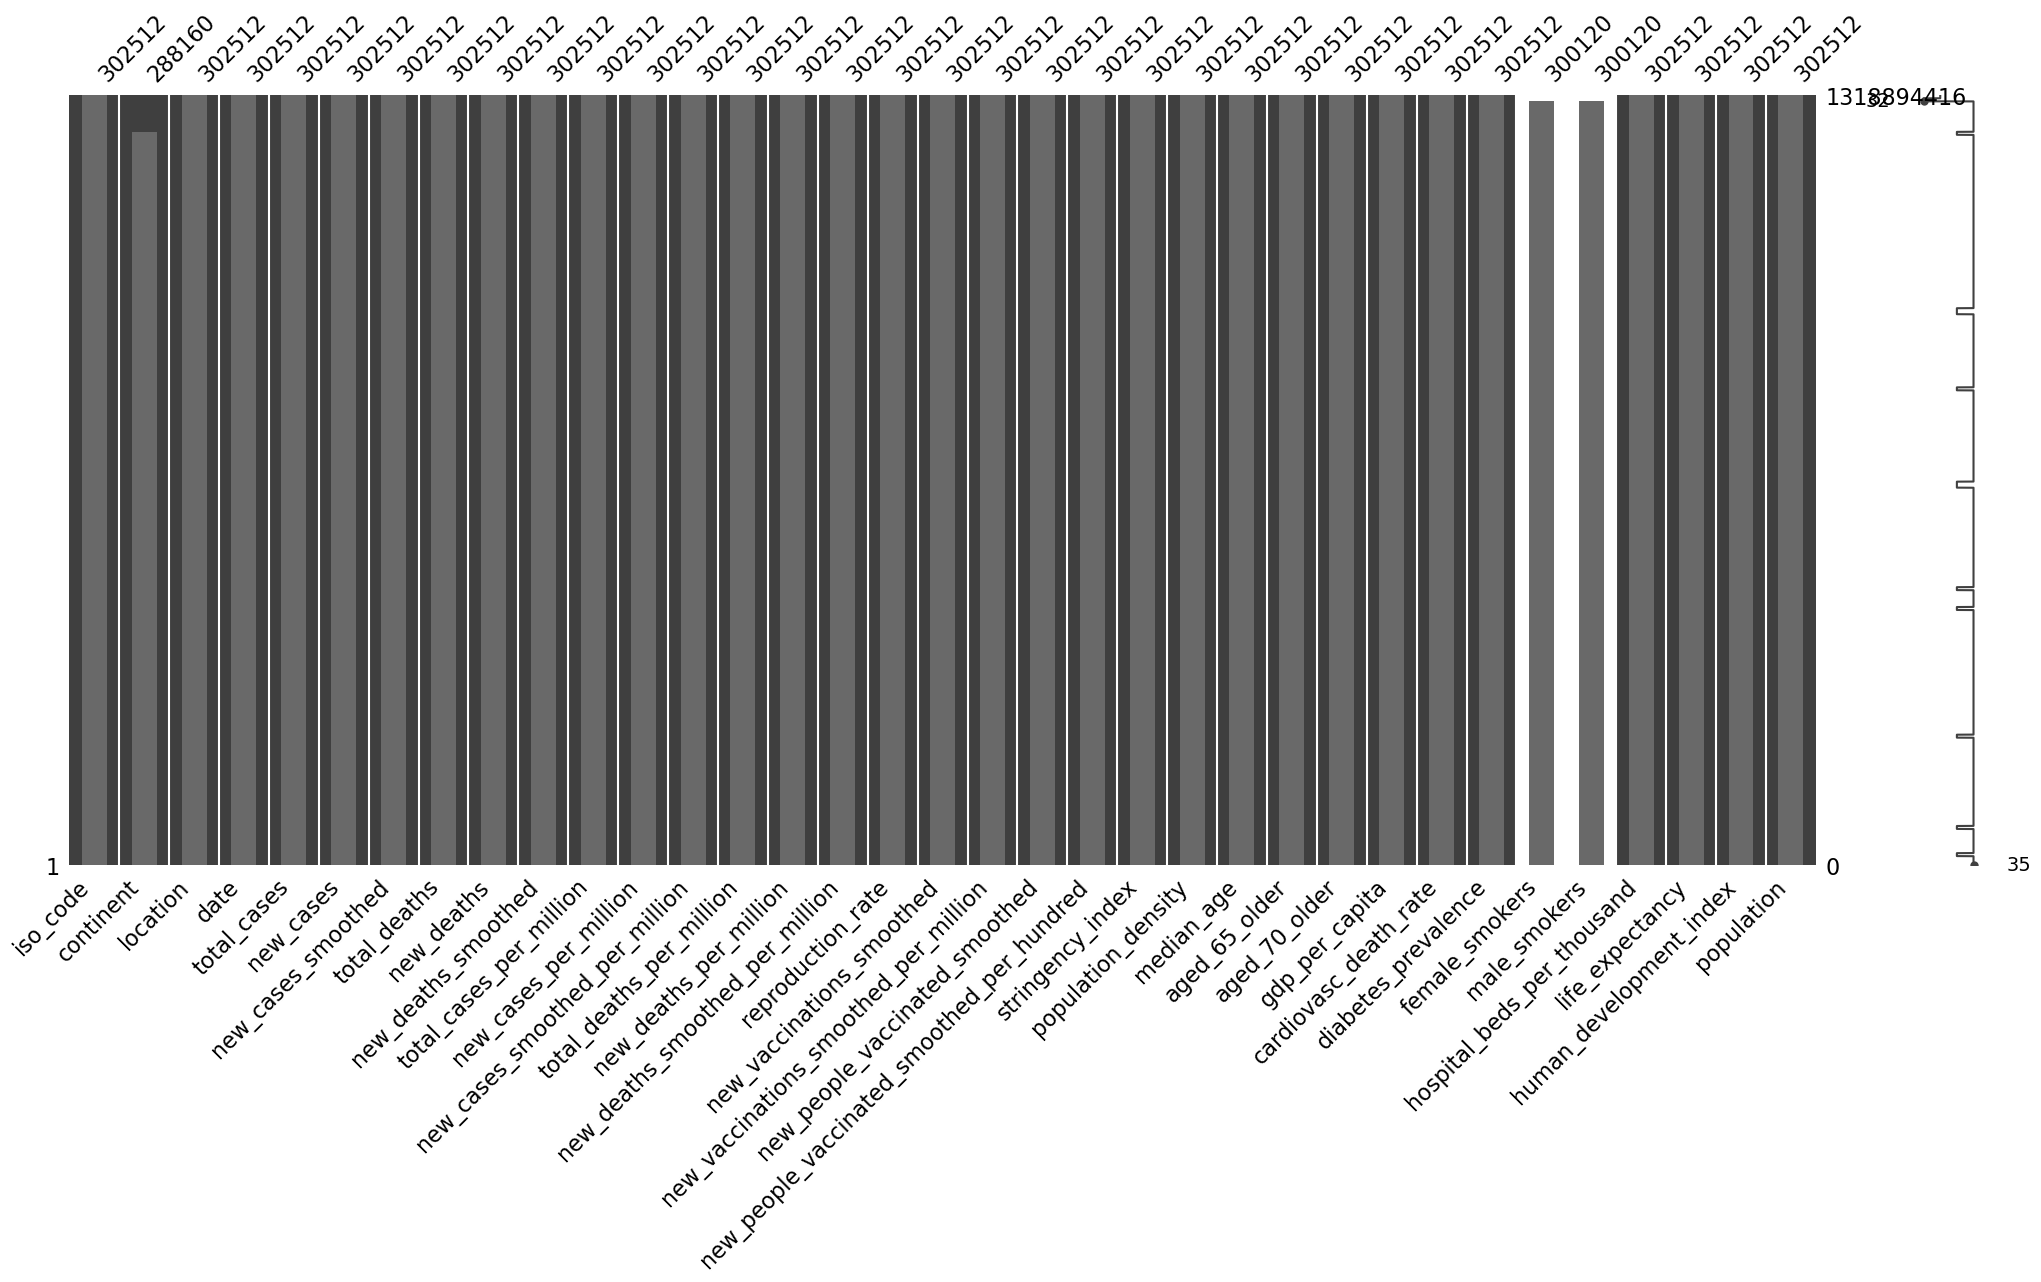

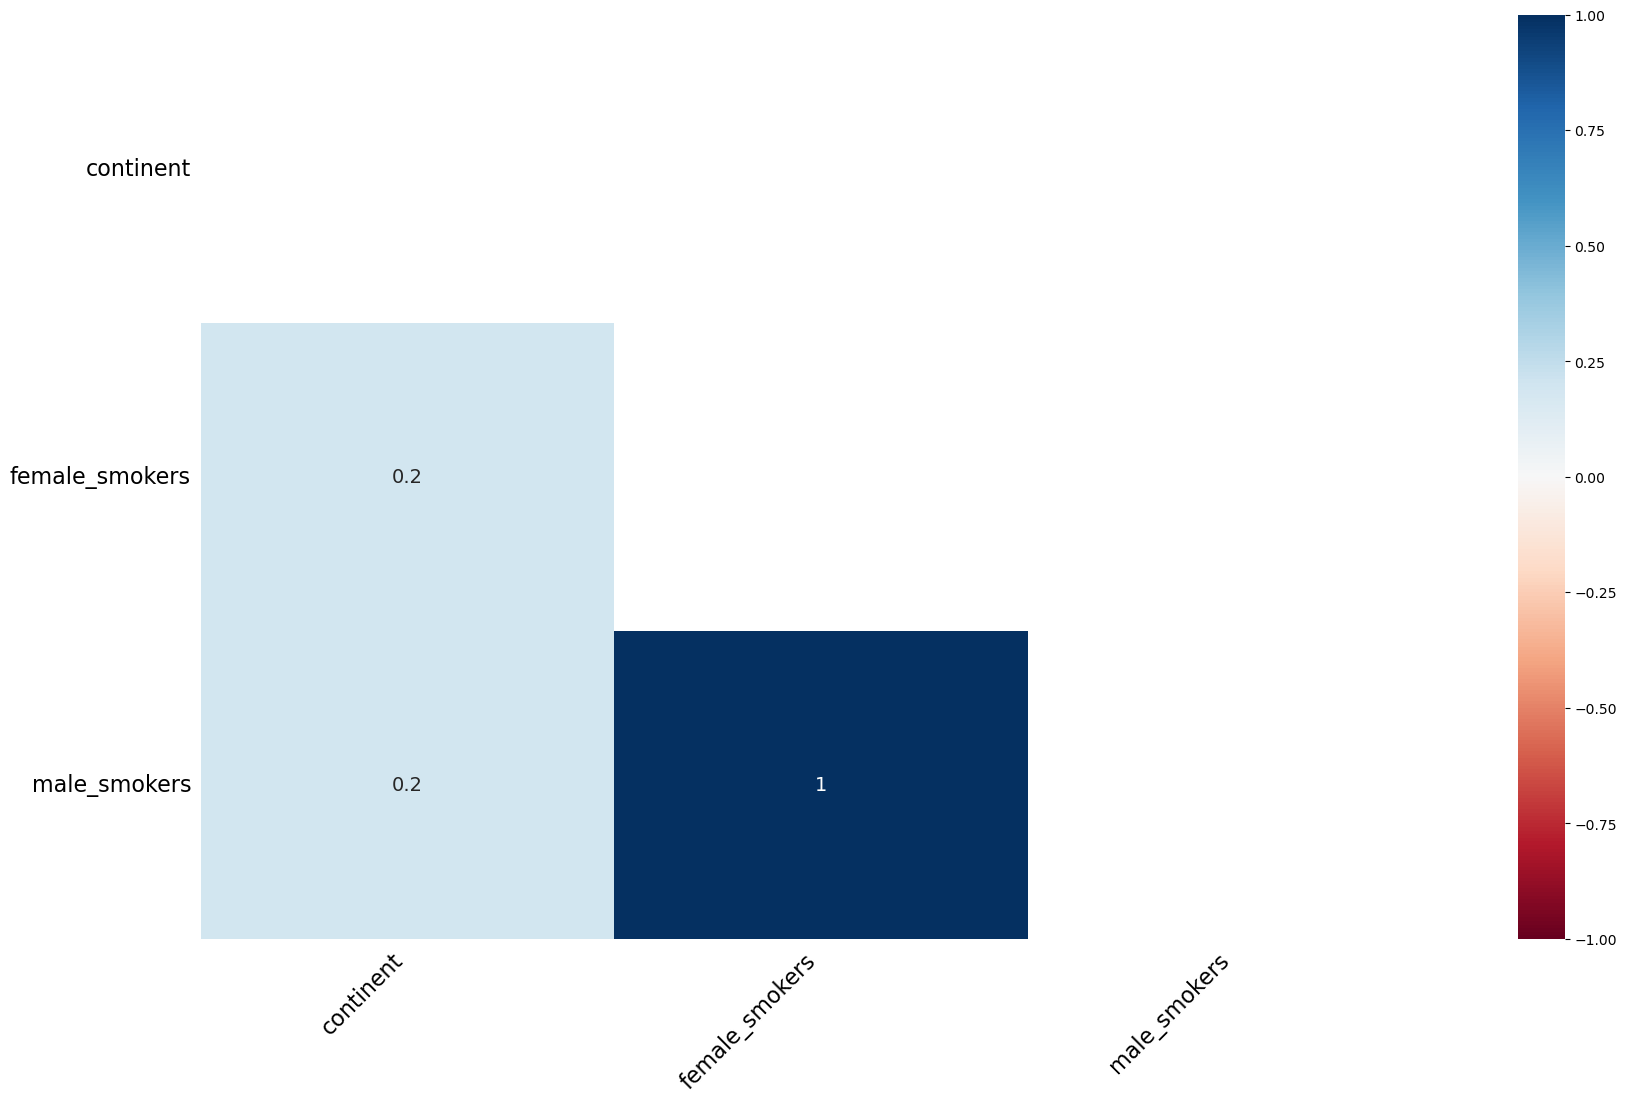

In [53]:
import pandas as pd
!pip install -q missingno
import missingno as msno

msno.matrix(country_data_imputed) # plot a matrix of missingness
msno.bar(country_data_imputed) # plot a bar chart of missingness
msno.heatmap(country_data_imputed) # plot a heatmap of correlation of missingness


# Checking outliers

In [32]:
import pandas as pd

# Load your dataset (assuming you already have 'data' DataFrame)
df = data.copy()

# Define the column to check for outliers
column_name = 'total_cases'
column_data = df[column_name]

# Calculate Z-scores for the 'total_cases' column
z_scores = (column_data - column_data.mean()) / column_data.std()

# Define the threshold for Z-score to identify outliers
threshold = 3

# Identify outliers based on the absolute Z-scores exceeding the threshold
outliers = df[abs(z_scores) > threshold]

# Print the outliers
print("Outliers:")
display(outliers)

Outliers:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
15129,OWID_ASI,NaN,Asia,2022-02-16,109821929.0,581226.0,555233.857,1329329.0,1968.0,1995.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
15130,OWID_ASI,NaN,Asia,2022-02-17,110417719.0,595790.0,549642.857,1331527.0,2198.0,1947.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
15131,OWID_ASI,NaN,Asia,2022-02-18,111015976.0,598257.0,549909.714,1333603.0,2076.0,1962.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
15132,OWID_ASI,NaN,Asia,2022-02-19,111591120.0,575144.0,548113.286,1335458.0,1855.0,1924.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
15133,OWID_ASI,NaN,Asia,2022-02-20,112130205.0,539085.0,554180.286,1337520.0,2062.0,1954.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298919,OWID_WRL,NaN,World,2023-04-08,762609674.0,50649.0,68088.429,6896136.0,207.0,305.857,...,5.355,15469.207,233.07,8.51,6.434,34.635,2.705,72.58,0.737,7.975105e+09
298920,OWID_WRL,NaN,World,2023-04-09,762739136.0,129462.0,75129.857,6896765.0,629.0,349.714,...,5.355,15469.207,233.07,8.51,6.434,34.635,2.705,72.58,0.737,7.975105e+09
298921,OWID_WRL,NaN,World,2023-04-10,762773745.0,34609.0,67734.000,6896918.0,153.0,320.857,...,5.355,15469.207,233.07,8.51,6.434,34.635,2.705,72.58,0.737,7.975105e+09
298922,OWID_WRL,NaN,World,2023-04-11,762790388.0,16643.0,60964.857,6897012.0,94.0,257.857,...,5.355,15469.207,233.07,8.51,6.434,34.635,2.705,72.58,0.737,7.975105e+09


In [22]:
# Find all unique iso_codes that start with "OWID_"
regional_data = country_data_imputed[country_data_imputed['iso_code'].str.startswith('OWID_')]

# Get unique iso_codes and their corresponding locations
unique_regional_data = regional_data.drop_duplicates(subset=['iso_code'])[['iso_code', 'location']]

# Print the unique iso_codes together with their locations
print("Regional ISO Codes and Locations:")
for index, row in unique_regional_data.iterrows():
    print(f"Iso_Code: {row['iso_code']}, Location: {row['location']}")

Regional ISO Codes and Locations:
Iso_Code: OWID_AFR, Location: Africa
Iso_Code: OWID_ASI, Location: Asia
Iso_Code: OWID_ENG, Location: England
Iso_Code: OWID_EUR, Location: Europe
Iso_Code: OWID_EUN, Location: European Union
Iso_Code: OWID_HIC, Location: High income
Iso_Code: OWID_KOS, Location: Kosovo
Iso_Code: OWID_LIC, Location: Low income
Iso_Code: OWID_LMC, Location: Lower middle income
Iso_Code: OWID_NAM, Location: North America
Iso_Code: OWID_CYN, Location: Northern Cyprus
Iso_Code: OWID_NIR, Location: Northern Ireland
Iso_Code: OWID_OCE, Location: Oceania
Iso_Code: OWID_SCT, Location: Scotland
Iso_Code: OWID_SAM, Location: South America
Iso_Code: OWID_UMC, Location: Upper middle income
Iso_Code: OWID_WLS, Location: Wales
Iso_Code: OWID_WRL, Location: World


In [187]:
# Separate the main dataset into country-level data and regional data
country_data = country_data_imputed[~country_data_imputed['iso_code'].str.startswith('OWID_')]
regional_data = country_data_imputed[country_data_imputed['iso_code'].str.startswith('OWID_')]

# Print the country-level data
print("Country-Level Data:")
display(country_data)

# Print the regional data
print("Regional Data:")
display(regional_data)

Country-Level Data:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-01-03,1.00,0.00,0.00,1.00,0.00,0.00,...,1.34,1803.99,597.03,9.59,1.90,24.70,0.50,64.83,0.51,41128772.00
1,AFG,Asia,Afghanistan,2020-01-04,1.00,0.00,0.00,1.00,0.00,0.00,...,1.34,1803.99,597.03,9.59,1.90,24.70,0.50,64.83,0.51,41128772.00
2,AFG,Asia,Afghanistan,2020-01-05,1.00,0.00,0.00,1.00,0.00,0.00,...,1.34,1803.99,597.03,9.59,1.90,24.70,0.50,64.83,0.51,41128772.00
3,AFG,Asia,Afghanistan,2020-01-06,1.00,0.00,0.00,1.00,0.00,0.00,...,1.34,1803.99,597.03,9.59,1.90,24.70,0.50,64.83,0.51,41128772.00
4,AFG,Asia,Afghanistan,2020-01-07,1.00,0.00,0.00,1.00,0.00,0.00,...,1.34,1803.99,597.03,9.59,1.90,24.70,0.50,64.83,0.51,41128772.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330777,ZWE,Africa,Zimbabwe,2023-07-29,265693.00,0.00,0.00,5712.00,1.00,0.14,...,1.88,1899.78,307.85,1.82,1.60,30.70,1.70,61.49,0.57,16320539.00
330778,ZWE,Africa,Zimbabwe,2023-07-30,265693.00,0.00,0.00,5712.00,0.00,0.14,...,1.88,1899.78,307.85,1.82,1.60,30.70,1.70,61.49,0.57,16320539.00
330779,ZWE,Africa,Zimbabwe,2023-07-31,265693.00,0.00,0.00,5712.00,0.00,0.14,...,1.88,1899.78,307.85,1.82,1.60,30.70,1.70,61.49,0.57,16320539.00
330780,ZWE,Africa,Zimbabwe,2023-08-01,265693.00,0.00,0.00,5712.00,0.00,0.14,...,1.88,1899.78,307.85,1.82,1.60,30.70,1.70,61.49,0.57,16320539.00


Regional Data:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
1308,OWID_AFR,NaN,Africa,2020-01-03,1.00,0.00,0.00,1.00,0.00,0.00,...,1.73,18933.91,191.03,2.42,1.90,24.70,0.70,76.88,0.78,1426736614.00
1309,OWID_AFR,NaN,Africa,2020-01-04,1.00,0.00,0.00,1.00,0.00,0.00,...,1.73,18933.91,191.03,2.42,1.90,24.70,0.70,76.88,0.78,1426736614.00
1310,OWID_AFR,NaN,Africa,2020-01-05,1.00,0.00,0.00,1.00,0.00,0.00,...,1.73,18933.91,191.03,2.42,1.90,24.70,0.70,76.88,0.78,1426736614.00
1311,OWID_AFR,NaN,Africa,2020-01-06,1.00,0.00,0.00,1.00,0.00,0.00,...,1.73,18933.91,191.03,2.42,1.90,24.70,0.70,76.88,0.78,1426736614.00
1312,OWID_AFR,NaN,Africa,2020-01-07,1.00,0.00,0.00,1.00,0.00,0.00,...,1.73,18933.91,191.03,2.42,1.90,24.70,0.70,76.88,0.78,1426736614.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326853,OWID_WRL,NaN,World,2023-08-01,768982331.00,3494.00,50703.29,6953730.00,54.00,97.00,...,5.36,15469.21,233.07,8.51,6.43,34.63,2.71,72.58,0.74,7975105024.00
326854,OWID_WRL,NaN,World,2023-08-02,768982331.00,0.00,50420.57,6953730.00,0.00,96.29,...,5.36,15469.21,233.07,8.51,6.43,34.63,2.71,72.58,0.74,7975105024.00
326855,OWID_WRL,NaN,World,2023-08-03,1.00,0.00,0.00,1.00,0.00,0.00,...,5.36,15469.21,233.07,8.51,6.43,34.63,2.71,72.58,0.74,7975105024.00
326856,OWID_WRL,NaN,World,2023-08-04,1.00,0.00,0.00,1.00,0.00,0.00,...,5.36,15469.21,233.07,8.51,6.43,34.63,2.71,72.58,0.74,7975105024.00


In [12]:
import numpy as np

# Calculate Z-scores for numerical columns
z_scores = (country_data.select_dtypes(include=np.number) - country_data.select_dtypes(include=np.number).mean()) / country_data.select_dtypes(include=np.number).std()

# Define a threshold for outlier detection (typically Z-score > 3 or < -3)
threshold = 3

# Identify outliers for each numerical column
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Print the rows containing outlier data for each numerical column
print("Outliers in Country Data:")
print(country_data[outliers.any(axis=1)])

Outliers in Country Data:
       iso_code continent        location       date  total_cases  new_cases  \
5587        ASM   Oceania  American Samoa 2022-03-16        779.0      163.0   
5589        ASM   Oceania  American Samoa 2022-03-18       1063.0      284.0   
5592        ASM   Oceania  American Samoa 2022-03-21       1397.0      334.0   
5593        ASM   Oceania  American Samoa 2022-03-22       1571.0      174.0   
5594        ASM   Oceania  American Samoa 2022-03-23       1626.0       55.0   
...         ...       ...             ...        ...          ...        ...   
302134      ZWE    Africa        Zimbabwe 2022-03-31     246182.0      140.0   
302135      ZWE    Africa        Zimbabwe 2022-04-01     246286.0      104.0   
302136      ZWE    Africa        Zimbabwe 2022-04-02     246414.0      128.0   
302137      ZWE    Africa        Zimbabwe 2022-04-03     246481.0       67.0   
302138      ZWE    Africa        Zimbabwe 2022-04-04     246525.0       44.0   

        new_c

In [13]:
# Filter the rows with outliers in 'total_cases' column
outlier_total_cases = country_data[outliers['total_cases']]

# Print the necessary data for investigation
print("Investigation of Outliers in 'total_cases':")
print(outlier_total_cases[['iso_code', 'continent', 'location', 'date', 'total_cases', 'population']])

# Check the summary statistics for 'total_cases' to understand the range of values
print("\nSummary Statistics for 'total_cases':")
print(country_data['total_cases'].describe())

# Calculate the top 10 highest 'total_cases' values
top_10_total_cases = country_data.nlargest(10, 'total_cases')
print("\nTop 10 Highest 'total_cases':")
print(top_10_total_cases[['iso_code', 'continent', 'location', 'date', 'total_cases', 'population']])

# Calculate the top 10 highest 'total_cases' values in outlier data
top_10_outlier_total_cases = outlier_total_cases.nlargest(10, 'total_cases')
print("\nTop 10 Highest 'total_cases' in Outliers:")
print(top_10_outlier_total_cases[['iso_code', 'continent', 'location', 'date', 'total_cases', 'population']])

# Check the dates with highest 'total_cases' in the outlier data
date_with_highest_total_cases = outlier_total_cases.nlargest(1, 'total_cases')[['iso_code', 'continent', 'location', 'date', 'total_cases', 'population']]
print("\nDate with Highest 'total_cases' in Outliers:")
print(date_with_highest_total_cases)

Investigation of Outliers in 'total_cases':
       iso_code      continent       location       date  total_cases  \
36429       BRA  South America         Brazil 2021-07-03   18622304.0   
36430       BRA  South America         Brazil 2021-07-04   18687469.0   
36431       BRA  South America         Brazil 2021-07-05   18742025.0   
36432       BRA  South America         Brazil 2021-07-06   18769808.0   
36433       BRA  South America         Brazil 2021-07-07   18792511.0   
...         ...            ...            ...        ...          ...   
285858      USA  North America  United States 2023-04-08  102873924.0   
285859      USA  North America  United States 2023-04-09  102873924.0   
285860      USA  North America  United States 2023-04-10  102873924.0   
285861      USA  North America  United States 2023-04-11  102873924.0   
285862      USA  North America  United States 2023-04-12  102873924.0   

         population  
36429   215313504.0  
36430   215313504.0  
36431   21531

In [197]:
country_data.continent.unique()

['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America']
Categories (6, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

Text(0.5, 0, 'Date')

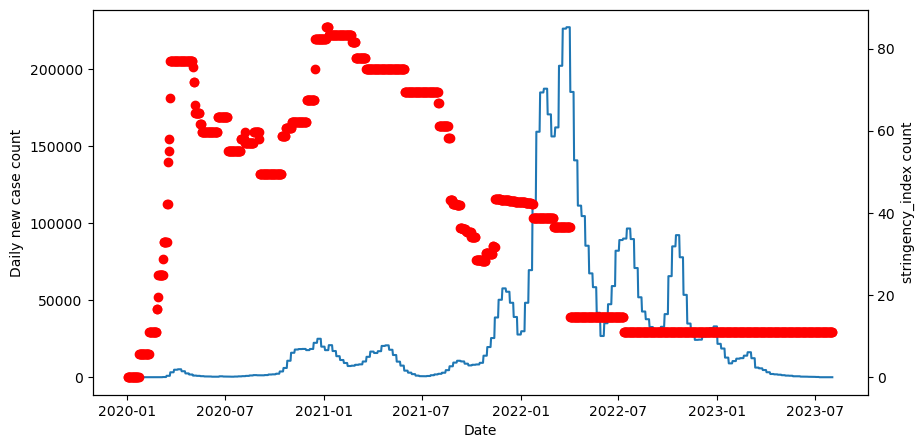

In [196]:
df = country_data.copy()
df_country = df.loc[df['location']==country]
df_country = df_country[['date','new_cases_smoothed','stringency_index']]

#df_country = df_country.fillna(0.0)
df_country.index = pd.to_datetime(df_country['date'])
df_country.drop(columns='date',inplace=True)
df_country

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_country.index,df_country['new_cases_smoothed'])
ax.set_ylabel('Daily new case count')
ax1 = ax.twinx()
ax1.set_ylabel('stringency_index count')
ax1.plot(df_country.index,df_country['stringency_index'],'ro')
ax.set_xlabel('Date')

In [81]:
import pandas as pd
#read cleaned country data
country_data = pd.read_csv('country_data_cleaned.csv')
country_data['date'] = pd.to_datetime(data['date'])
country_data['iso_code'] = country_data['iso_code'].astype('category')
country_data['continent'] = country_data['continent'].astype('category')
country_data['location'] = country_data['location'].astype('category')

In [82]:
country_data.dtypes

iso_code                                            category
continent                                           category
location                                            category
date                                          datetime64[ns]
total_cases                                          float64
new_cases                                            float64
new_cases_smoothed                                   float64
total_deaths                                         float64
new_deaths                                           float64
new_deaths_smoothed                                  float64
total_cases_per_million                              float64
new_cases_per_million                                float64
new_cases_smoothed_per_million                       float64
total_deaths_per_million                             float64
new_deaths_per_million                               float64
new_deaths_smoothed_per_million                      float64
reproduction_rate       

In [43]:
display(country_data)
print(country_data.shape)
# Check the number and percentage of missing values
missing = country_data.isnull().sum()
percent = missing / len(country_data) * 100
print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-01-03,119832.976399,0.0,177.850152,5096.870968,0.0,6.619657,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-01-04,119832.976399,0.0,177.850152,5096.870968,0.0,6.619657,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-01-05,119832.976399,0.0,177.850152,5096.870968,0.0,6.619657,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-01-06,119832.976399,0.0,177.850152,5096.870968,0.0,6.619657,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-01-07,119832.976399,0.0,177.850152,5096.870968,0.0,6.619657,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302507,ZWE,Africa,Zimbabwe,2023-04-08,264578.000000,2.0,4.143000,5684.000000,1.0,0.571000,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
302508,ZWE,Africa,Zimbabwe,2023-04-09,264582.000000,4.0,4.714000,5684.000000,0.0,0.571000,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
302509,ZWE,Africa,Zimbabwe,2023-04-10,264584.000000,2.0,4.143000,5684.000000,0.0,0.571000,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
302510,ZWE,Africa,Zimbabwe,2023-04-11,264584.000000,0.0,3.143000,5684.000000,0.0,0.571000,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0


(281807, 35)
                                            Missing   Percent
iso_code                                          0  0.000000
continent                                         0  0.000000
location                                          0  0.000000
date                                              0  0.000000
total_cases                                       0  0.000000
new_cases                                         0  0.000000
new_cases_smoothed                                0  0.000000
total_deaths                                      0  0.000000
new_deaths                                        0  0.000000
new_deaths_smoothed                               0  0.000000
total_cases_per_million                           0  0.000000
new_cases_per_million                             0  0.000000
new_cases_smoothed_per_million                    0  0.000000
total_deaths_per_million                          0  0.000000
new_deaths_per_million                            0  0.00

In [14]:
# Dataset_LocationWise = survey_df.groupby('location', as_index=False)
Dataset_LocationWise = country_data.groupby('location').max('date')
Dataset_LocationWise

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,211630.0,3243.0,2095.571,7884.0,159.0,97.571,32178.218,78.850,50.951,603.656,...,1.337,1803.987,597.029,9.59,1.9,24.7,0.50,64.83,0.511,41128772.0
Albania,333897.0,2832.0,2210.286,3604.0,21.0,20.429,117473.485,996.370,777.635,1267.979,...,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
Algeria,271613.0,2521.0,2177.571,6881.0,49.0,38.286,32178.218,56.143,48.495,603.656,...,3.857,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,0.748,44903228.0
American Samoa,8326.0,955.0,307.714,34.0,5.0,1.429,187967.039,21559.995,6946.930,767.581,...,1.726,17336.469,283.750,2.42,1.9,24.7,0.70,73.74,0.779,44295.0
Andorra,47939.0,1676.0,588.571,159.0,6.0,1.714,600415.816,20991.195,7371.610,1991.408,...,1.726,17336.469,109.135,7.97,29.0,37.8,0.70,83.73,0.868,79843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,3427.0,2654.0,379.143,7.0,7.0,1.000,295532.942,228872.025,32696.004,603.656,...,1.726,17336.469,152.783,2.42,1.9,24.7,0.70,79.94,0.779,11596.0
Western Sahara,1.0,0.0,0.000,1.0,0.0,0.000,32178.218,0.000,0.000,603.656,...,1.380,17336.469,152.783,2.42,1.9,24.7,0.70,70.26,0.779,576005.0
Yemen,11945.0,287.0,109.429,2159.0,60.0,16.429,32178.218,8.517,3.247,603.656,...,1.583,1479.147,495.003,5.35,7.6,29.2,0.70,66.12,0.470,33696612.0


In [10]:
country_data.to_csv('country_data_cleaned.csv', index=False)

In [15]:
top_countries = Dataset_LocationWise.gdp_per_capita.sort_values(ascending =False).head(15)
top_countries

location
Qatar                   116935.600
Macao                   104861.851
Luxembourg               94277.965
Singapore                85535.383
Brunei                   71809.251
Ireland                  67335.293
United Arab Emirates     67293.483
Kuwait                   65530.537
Norway                   64800.057
Switzerland              57410.166
San Marino               56861.470
Hong Kong                56054.920
United States            54225.446
Bermuda                  50669.315
Cayman Islands           49903.029
Name: gdp_per_capita, dtype: float64

Number of outliers: 7046


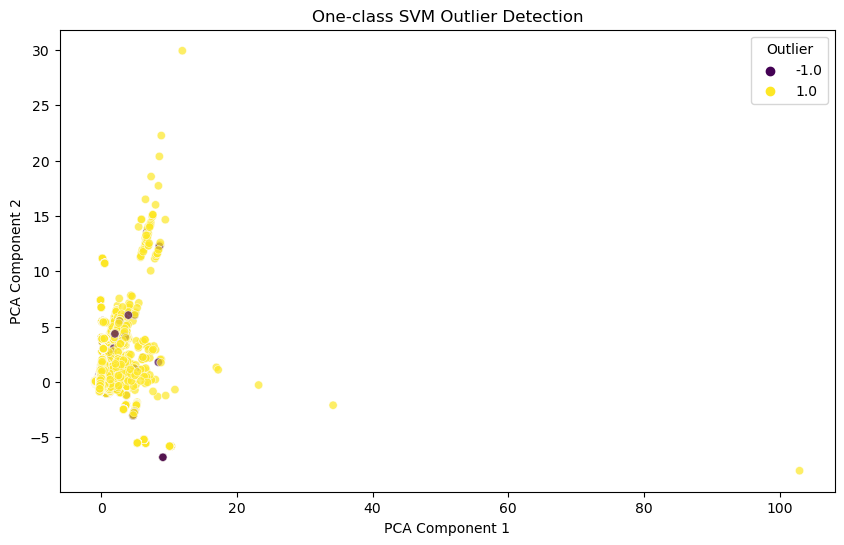

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

# Assuming your DataFrame is named "country_data"
# Create a copy of the DataFrame to avoid modifying the main DataFrame
data_for_clustering = country_data.copy()

# Select the features you want to use for outlier detection (e.g., 'total_cases', 'new_cases', etc.)
selected_features = ['total_cases', 'new_cases', 'gdp_per_capita', 'population_density']

# Create a new DataFrame with only the selected features
data_for_outlier_detection = data_for_clustering[selected_features]

# Reduce data size: Use a random sample of the data for outlier detection
data_for_outlier_detection = data_for_outlier_detection.sample(frac=0.5, random_state=42)

# Standardize the data (important for SVM)
scaler = StandardScaler()
data_for_outlier_detection_std = scaler.fit_transform(data_for_outlier_detection)

# Incremental PCA
n_components = 3  # You can adjust the number of components based on your memory constraints
batch_size = 30000  # Adjust the batch size based on available memory
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)

# Initialize an empty DataFrame to store the IPCA results
data_for_outlier_detection_pca = pd.DataFrame()

# Perform IPCA in batches
for i in range(0, len(data_for_outlier_detection_std), batch_size):
    batch_pca = ipca.fit_transform(data_for_outlier_detection_std[i:i + batch_size])
    data_for_outlier_detection_pca = pd.concat([data_for_outlier_detection_pca, pd.DataFrame(batch_pca)], ignore_index=True)

# One-class SVM for outlier detection
nu = 0.05  # The proportion of outliers expected in the data (you can adjust this parameter)
one_class_svm = OneClassSVM(nu=nu)
outlier_labels = one_class_svm.fit_predict(data_for_outlier_detection_pca)

# Add the outlier labels to the copied DataFrame
data_for_outlier_detection['outlier'] = outlier_labels

# Print the number of outliers
num_outliers = len(data_for_outlier_detection[data_for_outlier_detection['outlier'] == -1])
print("Number of outliers:", num_outliers)

# Visualize the outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_for_outlier_detection_pca.iloc[:, 0], y=data_for_outlier_detection_pca.iloc[:, 1], hue='outlier', data=data_for_outlier_detection, palette='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('One-class SVM Outlier Detection')
plt.legend(title='Outlier', loc='upper right')
plt.show()


In [39]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named "country_data"
# Create a copy of the DataFrame to avoid modifying the main DataFrame
data_for_clustering = country_data.copy()

# Select the features you want to use for clustering (e.g., 'total_cases', 'new_cases', etc.)
selected_features = ['total_cases', 'new_cases', 'gdp_per_capita', 'population_density']

# Create a new DataFrame with only the selected features
data_for_clustering = data_for_clustering[selected_features]

# Reduce data size: Use a random sample of the data for clustering
data_for_clustering = data_for_clustering.sample(frac=0.1, random_state=42)

# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
data_for_clustering_std = scaler.fit_transform(data_for_clustering)

# Incremental DBSCAN
batch_size = 20000  # Adjust the batch size based on available memory
dbscan = DBSCAN(eps=2, min_samples=5)
clusters = []
for i in range(0, len(data_for_clustering_std), batch_size):
    batch_clusters = dbscan.fit_predict(data_for_clustering_std[i:i + batch_size])
    clusters.extend(batch_clusters)

# Add the cluster labels to the copied DataFrame
data_for_clustering['cluster'] = clusters

# Print the number of clusters (-1 indicates outliers)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_outliers = clusters.count(-1)
print("Number of clusters:", num_clusters)
print("Number of outliers:", num_outliers)

Number of clusters: 6
Number of outliers: 19


In [46]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

# Assuming your DataFrame is named "country_data"
# Create a copy of the DataFrame to avoid modifying the main DataFrame
data_for_clustering = country_data.copy()

# Select the features you want to use for clustering (e.g., 'total_cases', 'new_cases', etc.)
selected_features = ['total_cases', 'new_cases', 'gdp_per_capita', 'population_density']

# Create a new DataFrame with only the selected features
data_for_clustering = data_for_clustering[selected_features]

# Reduce data size: Use a random sample of the data for clustering
data_for_clustering = data_for_clustering.sample(frac=0.1, random_state=42)

# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
data_for_clustering_std = scaler.fit_transform(data_for_clustering)

# Incremental PCA
n_components = 2  # You can adjust the number of components based on your memory constraints
batch_size = 20000  # Adjust the batch size based on available memory
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)

# Initialize an empty DataFrame to store the IPCA results
data_for_clustering_pca = pd.DataFrame()

# Perform IPCA in batches
for i in range(0, len(data_for_clustering_std), batch_size):
    batch_pca = ipca.fit_transform(data_for_clustering_std[i:i + batch_size])
    data_for_clustering_pca = pd.concat([data_for_clustering_pca, pd.DataFrame(batch_pca)], ignore_index=True)

# Incremental DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
clusters = []
for i in range(0, len(data_for_clustering_pca), batch_size):
    batch_clusters = dbscan.fit_predict(data_for_clustering_pca[i:i + batch_size])
    clusters.extend(batch_clusters)

# Add the cluster labels to the copied DataFrame
data_for_clustering['cluster'] = clusters

# Print the number of clusters (-1 indicates outliers)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_outliers = clusters.count(-1)
print("Number of clusters:", num_clusters)
print("Number of outliers:", num_outliers)

Number of clusters: 5
Number of outliers: 5


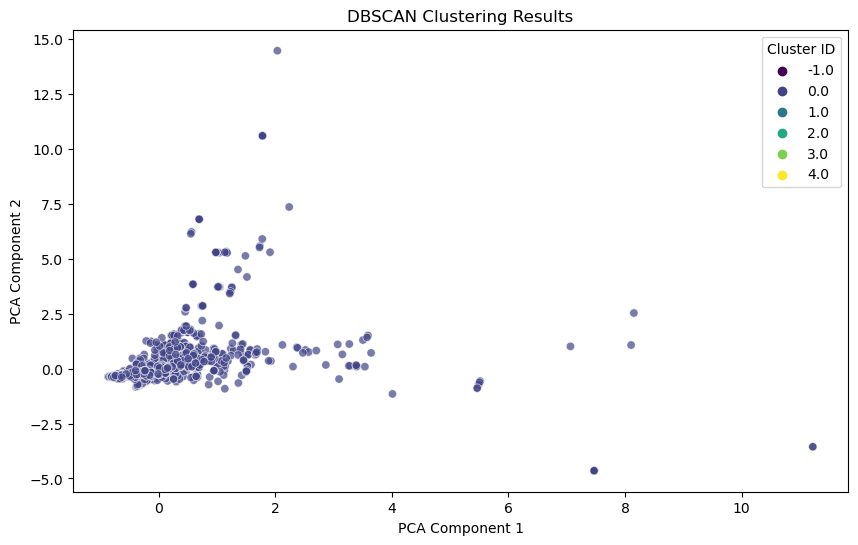

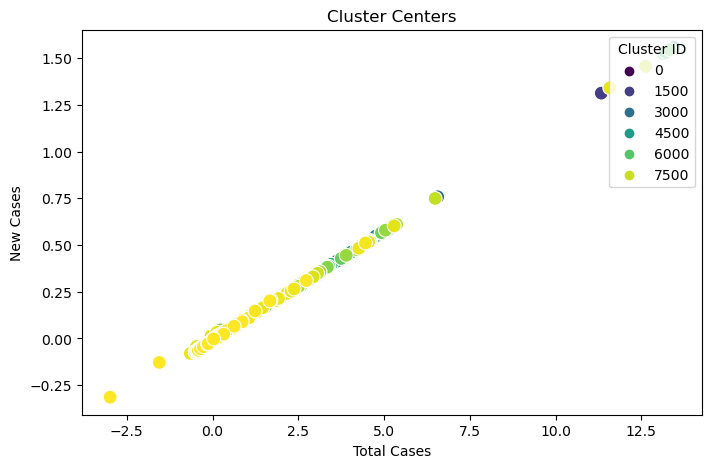

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

# Assuming your DataFrame is named "country_data"
# Create a copy of the DataFrame to avoid modifying the main DataFrame
data_for_clustering = country_data.copy()

# Select the features you want to use for clustering (e.g., 'total_cases', 'new_cases', etc.)
selected_features = ['total_cases', 'new_cases', 'gdp_per_capita', 'population_density']

# Create a new DataFrame with only the selected features
data_for_clustering = data_for_clustering[selected_features]

# Reduce data size: Use a random sample of the data for clustering
data_for_clustering = data_for_clustering.sample(frac=0.1, random_state=42)

# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
data_for_clustering_std = scaler.fit_transform(data_for_clustering)

# Incremental PCA
n_components = 2  # You can adjust the number of components based on your memory constraints
batch_size = 20000  # Adjust the batch size based on available memory
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)

# Initialize an empty DataFrame to store the IPCA results
data_for_clustering_pca = pd.DataFrame()

# Perform IPCA in batches
for i in range(0, len(data_for_clustering_std), batch_size):
    batch_pca = ipca.fit_transform(data_for_clustering_std[i:i + batch_size])
    data_for_clustering_pca = pd.concat([data_for_clustering_pca, pd.DataFrame(batch_pca)], ignore_index=True)

# Incremental DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
clusters = []
for i in range(0, len(data_for_clustering_pca), batch_size):
    batch_clusters = dbscan.fit_predict(data_for_clustering_pca[i:i + batch_size])
    clusters.extend(batch_clusters)

# Add the cluster labels to the copied DataFrame
data_for_clustering['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_for_clustering_pca.iloc[:, 0], y=data_for_clustering_pca.iloc[:, 1], hue='cluster', data=data_for_clustering, palette='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Results')
plt.legend(title='Cluster ID', loc='upper right')
plt.show()

# Plot the cluster centers (optional)
if len(set(clusters)) > 1:  # Skip if there's only one cluster (excluding outliers)
    cluster_centers = pd.DataFrame(ipca.inverse_transform(dbscan.components_), columns=selected_features)
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=cluster_centers['total_cases'], y=cluster_centers['new_cases'], hue=cluster_centers.index, palette='viridis', s=100)
    plt.xlabel('Total Cases')
    plt.ylabel('New Cases')
    plt.title('Cluster Centers')
    plt.legend(title='Cluster ID', loc='upper right')
    plt.show()

C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\decomposition\_incremental_pca.py:351: RuntimeWarning: divide by zero encountered in divide
  explained_variance_ratio = S**2 / np.sum(col_var * n_total_samples)


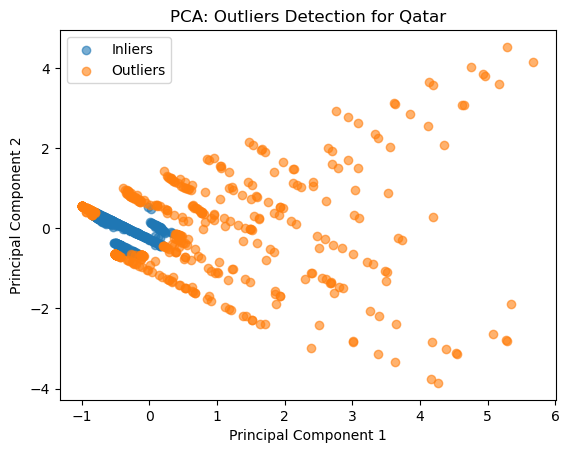

In [7]:
import pandas as pd
from sklearn.decomposition import IncrementalPCA
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Load your dataset and preprocess it
df = country_data.copy()

# Define the specific country for outlier detection
specific_country = 'Qatar'  # Replace 'Country_Name' with the country of interest

# Filter the dataset for the specific country
country_df = df[df['location'] == specific_country]

# Separate the features and labels for the specific country
features = country_df[['new_deaths', 'total_deaths', 'new_cases']]

# Apply PCA using IncrementalPCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize IncrementalPCA with the desired number of components (e.g., 2 for 2D visualization)
n_components = 2
pca = IncrementalPCA(n_components=n_components)
pca.fit(scaled_features)
reduced_features = pca.transform(scaled_features)

# Train the OneClassSVM for the specific country
svm_model = OneClassSVM()
svm_model.fit(reduced_features)

# Detect outliers for the specific country
outlier_labels = svm_model.predict(reduced_features)

# Optionally, you can visualize the outliers using a scatter plot
import matplotlib.pyplot as plt

inliers = reduced_features[outlier_labels == 1]
outliers = reduced_features[outlier_labels == -1]

plt.scatter(inliers[:, 0], inliers[:, 1], label='Inliers', alpha=0.6)
plt.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA: Outliers Detection for {specific_country}')
plt.legend()
plt.show()

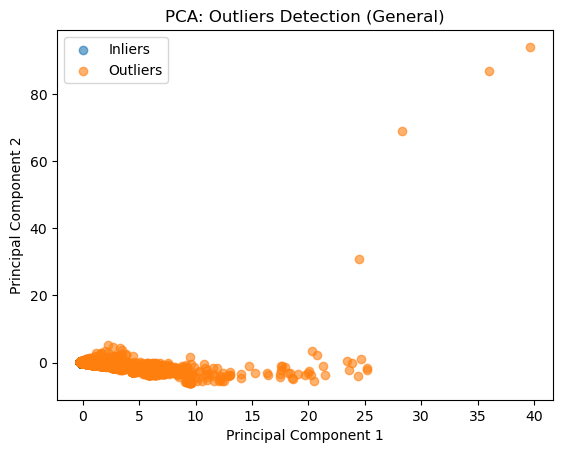

In [13]:
import pandas as pd
from sklearn.decomposition import IncrementalPCA
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

# Load your dataset and preprocess it (assuming you already have 'country_data' DataFrame)
df = country_data.copy()

# Define the features to use for outlier detection
features = ['new_deaths', 'total_deaths', 'new_cases']

# Filter the dataset for the selected features
selected_features = df[features]

# Use VarianceThreshold to remove constant or near-constant columns
selector = VarianceThreshold()
selected_features = selector.fit_transform(selected_features)

# Check if there are enough features for PCA (at least 2 features required for PCA)
if selected_features.shape[1] < 2:
    print("Insufficient features for PCA. Need at least 2 features.")
else:
    # Split the data into train and test sets, using only 50% of the data for PCA
    _, selected_features_pca, _, _ = train_test_split(selected_features, selected_features, test_size=0.1)

    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(selected_features_pca)

    # Initialize IncrementalPCA with the desired number of components (e.g., 2 for 2D visualization)
    n_components = min(2, selected_features_pca.shape[1])
    pca = IncrementalPCA(n_components=n_components)

    # Fit the IncrementalPCA on the scaled features
    pca.fit(scaled_features)

    # Transform the features to the reduced dimensions
    reduced_features = pca.transform(scaled_features)

    # Initialize OneClassSVM
    svm_model = OneClassSVM()

    # Fit the OneClassSVM on the reduced features
    svm_model.fit(reduced_features)

    # Predict outliers for the entire dataset
    outlier_labels = svm_model.predict(reduced_features)

    # Optionally, you can visualize the outliers using a scatter plot
    inliers = reduced_features[outlier_labels == 1]
    outliers = reduced_features[outlier_labels == -1]

    plt.scatter(inliers[:, 0], inliers[:, 1], label='Inliers', alpha=0.6)
    plt.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', alpha=0.6)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA: Outliers Detection (General)')
    plt.legend()
    plt.show()

In [110]:
latest_data = country_data.sort_values(by='date', ascending=False).head(1)

# Get the value of "total_cases" from the latest date
total_cases_latest_date = latest_data['total_cases'].values[0]

print("Total cases on the latest date:", total_cases_latest_date)

Total cases on the latest date: 264584.0


In [59]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

# Encode categorical features
le = LabelEncoder()
country_data["iso_code"] = le.fit_transform(df["iso_code"])
country_data["continent"] = le.fit_transform(df["continent"])
country_data["location"] = le.fit_transform(df["location"])
country_data["date"] = le.fit_transform(df["date"])

# Calculate mutual information scores
X = country_data.drop("total_cases", axis=1) # Features
y = country_data["total_cases"] # Target variable
corr_coeffs = X.corrwith(y) # Correlation coefficients

# Rank features by absolute values
corr_coeffs = pd.Series(corr_coeffs, name="Corr Coeffs", index=X.columns)
corr_coeffs = corr_coeffs.abs().sort_values(ascending=False)

# Select 10 features with highest absolute values
selected_features = corr_coeffs.head(15).index.tolist()

# Print selected features
print("The selected features are:")
print(selected_features)

C:\Users\ziyan\AppData\Local\Temp\ipykernel_6988\3182298778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["iso_code"] = le.fit_transform(df["iso_code"])
C:\Users\ziyan\AppData\Local\Temp\ipykernel_6988\3182298778.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["continent"] = le.fit_transform(df["continent"])
C:\Users\ziyan\AppData\Local\Temp\ipykernel_6988\3182298778.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

The selected features are:
['total_deaths', 'population', 'new_deaths_smoothed', 'new_deaths', 'new_cases_smoothed', 'new_cases', 'total_deaths_per_million', 'aged_70_older', 'total_cases_per_million', 'aged_65_older', 'date', 'new_vaccinations_smoothed', 'new_people_vaccinated_smoothed', 'median_age', 'female_smokers']


In [61]:
country_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,1,1,0,2,1.0,0.0,0.000,1.0,0.0,0.000,...,1.337,1803.987,597.029,9.59,1.9,24.7,0.5,64.83,0.511,41128772.0
1,1,1,0,3,1.0,0.0,0.000,1.0,0.0,0.000,...,1.337,1803.987,597.029,9.59,1.9,24.7,0.5,64.83,0.511,41128772.0
2,1,1,0,4,1.0,0.0,0.000,1.0,0.0,0.000,...,1.337,1803.987,597.029,9.59,1.9,24.7,0.5,64.83,0.511,41128772.0
3,1,1,0,5,1.0,0.0,0.000,1.0,0.0,0.000,...,1.337,1803.987,597.029,9.59,1.9,24.7,0.5,64.83,0.511,41128772.0
4,1,1,0,6,1.0,0.0,0.000,1.0,0.0,0.000,...,1.337,1803.987,597.029,9.59,1.9,24.7,0.5,64.83,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302507,236,0,236,1193,264578.0,2.0,4.143,5684.0,1.0,0.571,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
302508,236,0,236,1194,264582.0,4.0,4.714,5684.0,0.0,0.571,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
302509,236,0,236,1195,264584.0,2.0,4.143,5684.0,0.0,0.571,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
302510,236,0,236,1196,264584.0,0.0,3.143,5684.0,0.0,0.571,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0


C:\Users\ziyan\anaconda3\lib\site-packages\missingno\missingno.py:264: RuntimeWarning: overflow encountered in long_scalars
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)
C:\Users\ziyan\anaconda3\lib\site-packages\missingno\missingno.py:271: RuntimeWarning: overflow encountered in long_scalars
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<Axes: >

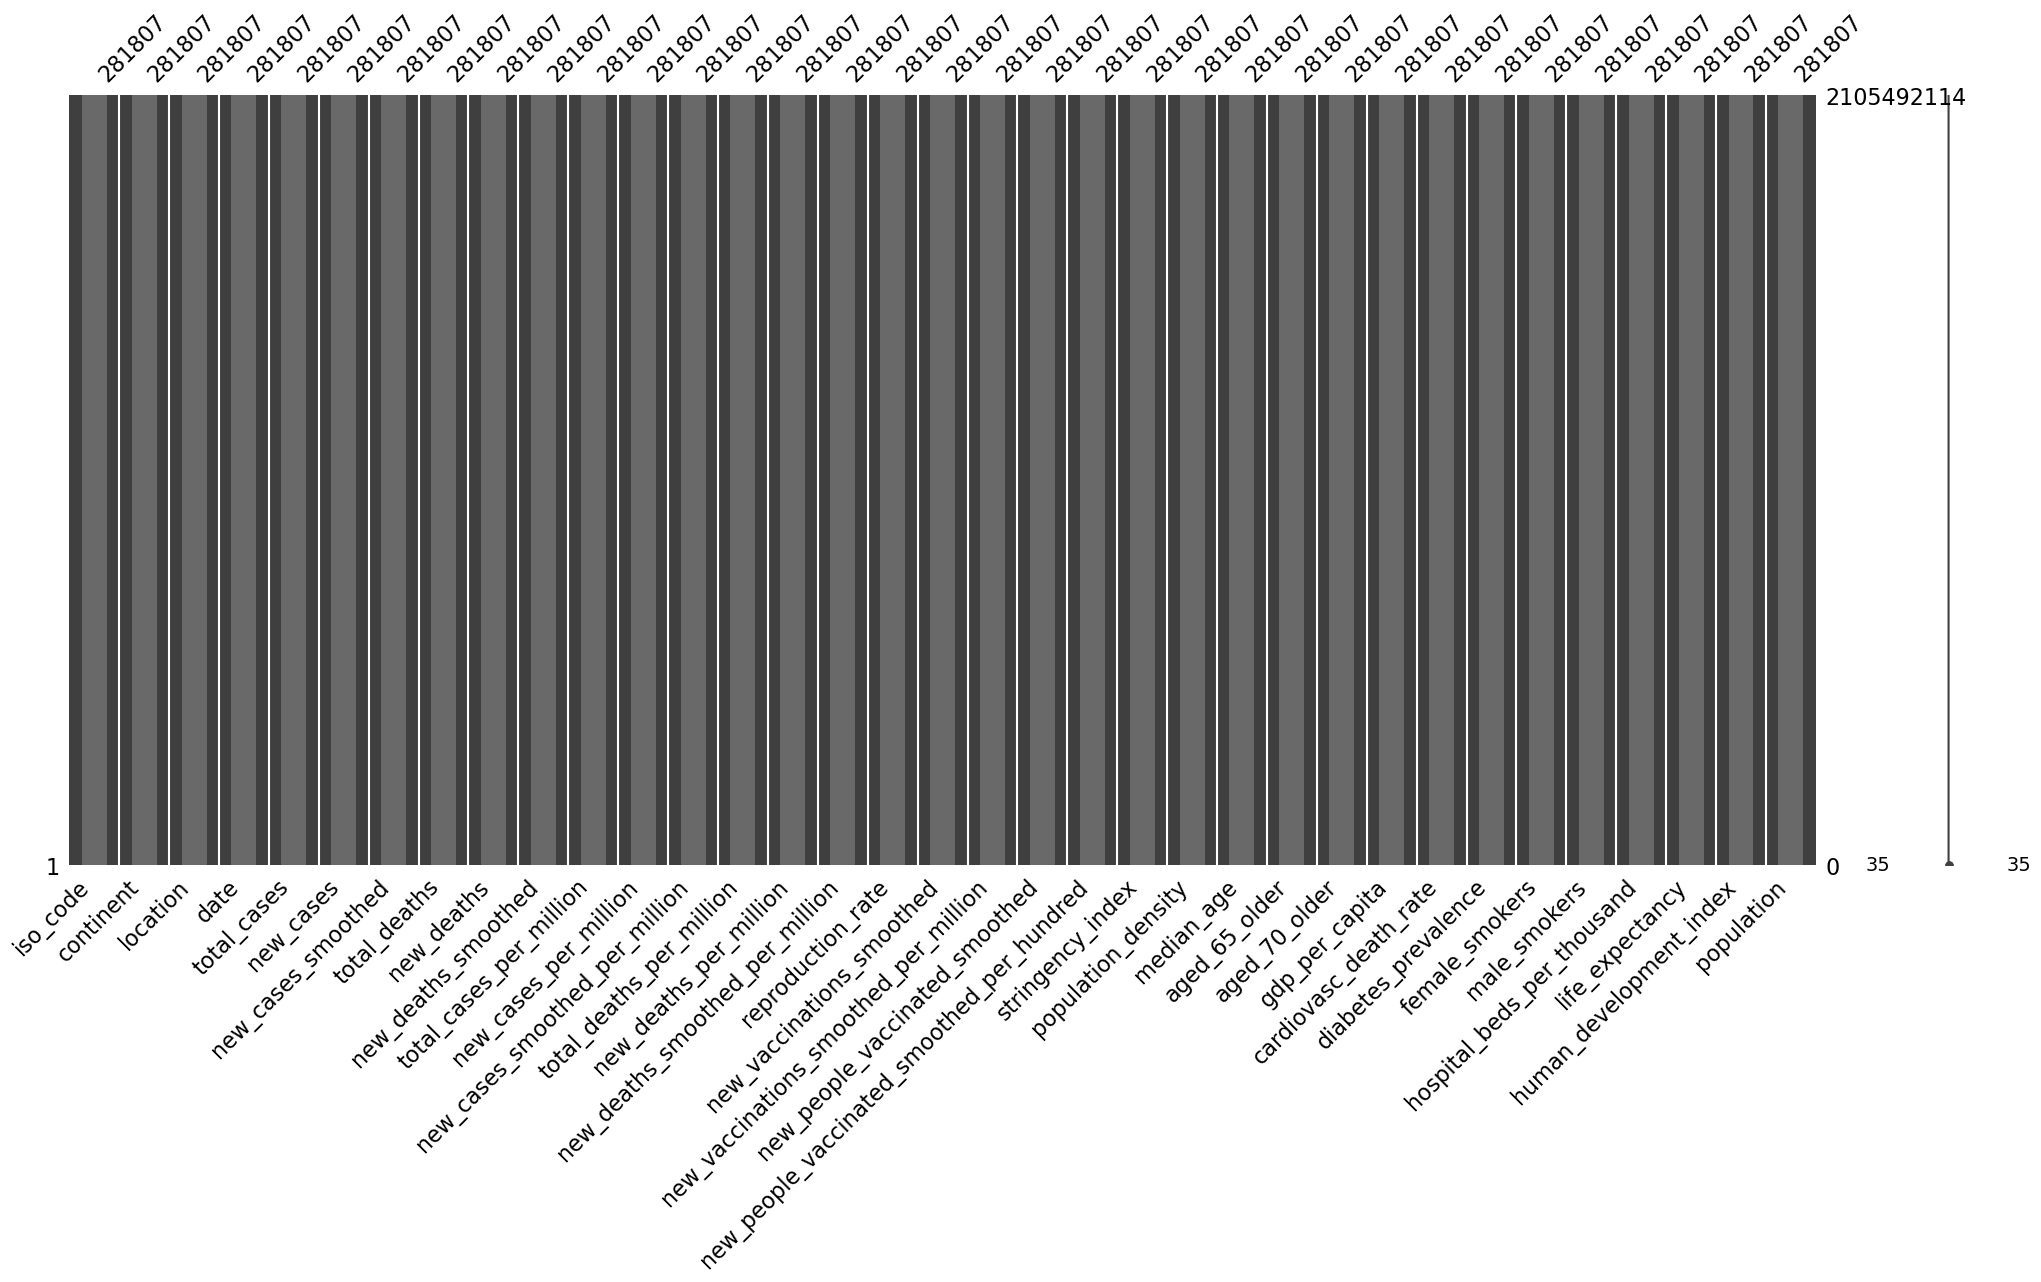

In [111]:
import pandas as pd
!pip install missingno
import missingno as msno

msno.matrix(country_data) # plot a matrix of missingness
msno.bar(country_data) # plot a bar chart of missingness

In [112]:
country_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-01-03,1.0,0.0,0.000,1.0,0.0,0.000,...,1.337,1803.987,597.029,9.59,1.9,24.7,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-01-04,1.0,0.0,0.000,1.0,0.0,0.000,...,1.337,1803.987,597.029,9.59,1.9,24.7,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-01-05,1.0,0.0,0.000,1.0,0.0,0.000,...,1.337,1803.987,597.029,9.59,1.9,24.7,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-01-06,1.0,0.0,0.000,1.0,0.0,0.000,...,1.337,1803.987,597.029,9.59,1.9,24.7,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-01-07,1.0,0.0,0.000,1.0,0.0,0.000,...,1.337,1803.987,597.029,9.59,1.9,24.7,0.5,64.83,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302507,ZWE,Africa,Zimbabwe,2023-04-08,264578.0,2.0,4.143,5684.0,1.0,0.571,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
302508,ZWE,Africa,Zimbabwe,2023-04-09,264582.0,4.0,4.714,5684.0,0.0,0.571,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
302509,ZWE,Africa,Zimbabwe,2023-04-10,264584.0,2.0,4.143,5684.0,0.0,0.571,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
302510,ZWE,Africa,Zimbabwe,2023-04-11,264584.0,0.0,3.143,5684.0,0.0,0.571,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0


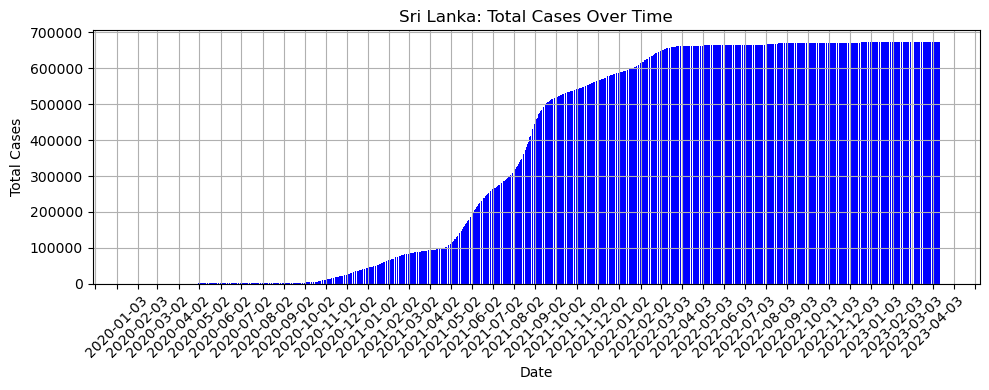

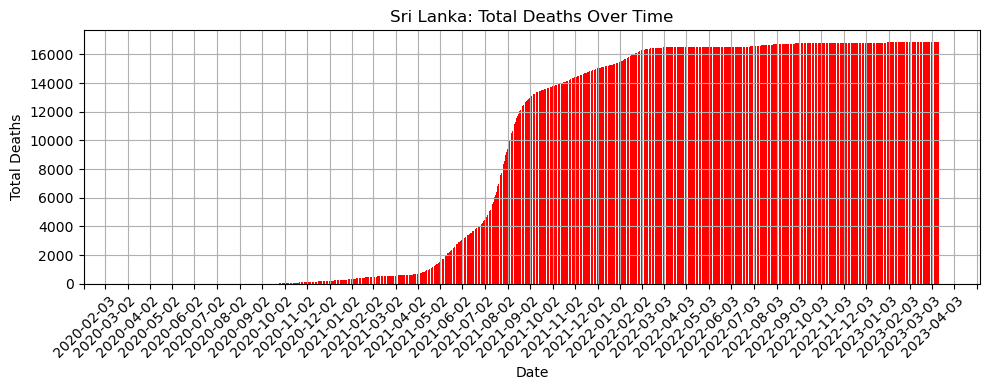

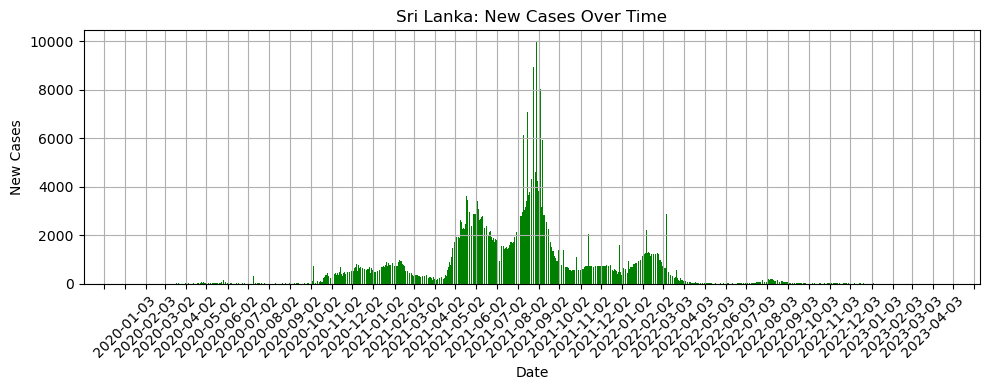

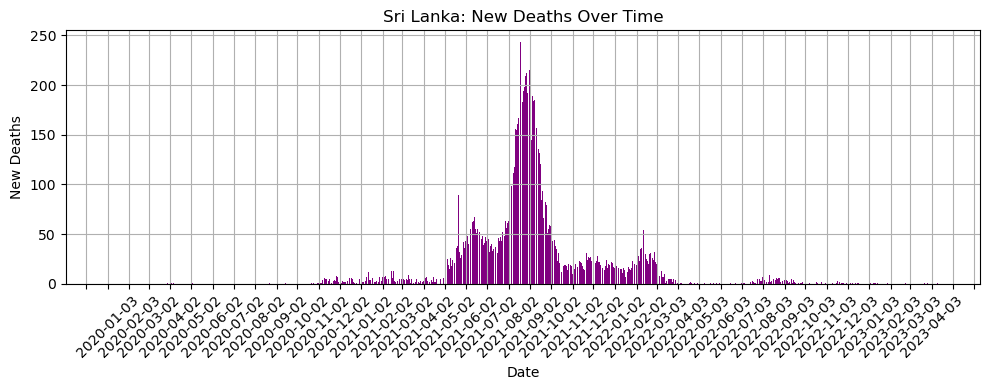

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# Assuming you have loaded the dataset into a pandas DataFrame named 'country_data'

# Filter data for a specific country (replace 'India' with the desired country name)
country_name = 'Sri Lanka'
country_data_specific = data[data['location'] == country_name]


# 2. Country-Specific Trends (Specific Country)

# Bar chart for specific country's Total Cases
plt.figure(figsize=(10, 4))
plt.bar(country_data_specific['date'], country_data_specific['total_cases'], label='Total Cases', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title(f'{country_name}: Total Cases Over Time')
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show ticks on a monthly basis
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

# Bar chart for specific country's Total Deaths
plt.figure(figsize=(10, 4))
plt.bar(country_data_specific['date'], country_data_specific['total_deaths'], label='Total Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title(f'{country_name}: Total Deaths Over Time')
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show ticks on a monthly basis
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

# Bar chart for specific country's New Cases
plt.figure(figsize=(10, 4))
plt.bar(country_data_specific['date'], country_data_specific['new_cases'], label='New Cases', color='green')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title(f'{country_name}: New Cases Over Time')
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show ticks on a monthly basis
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

# Bar chart for specific country's New Deaths
plt.figure(figsize=(10, 4))
plt.bar(country_data_specific['date'], country_data_specific['new_deaths'], label='New Deaths', color='purple')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title(f'{country_name}: New Deaths Over Time')
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show ticks on a monthly basis
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [18]:
country_data.dtypes

iso_code                                            category
continent                                           category
location                                            category
date                                          datetime64[ns]
total_cases                                          float64
new_cases                                            float64
new_cases_smoothed                                   float64
total_deaths                                         float64
new_deaths                                           float64
new_deaths_smoothed                                  float64
total_cases_per_million                              float64
new_cases_per_million                                float64
new_cases_smoothed_per_million                       float64
total_deaths_per_million                             float64
new_deaths_per_million                               float64
new_deaths_smoothed_per_million                      float64
reproduction_rate       

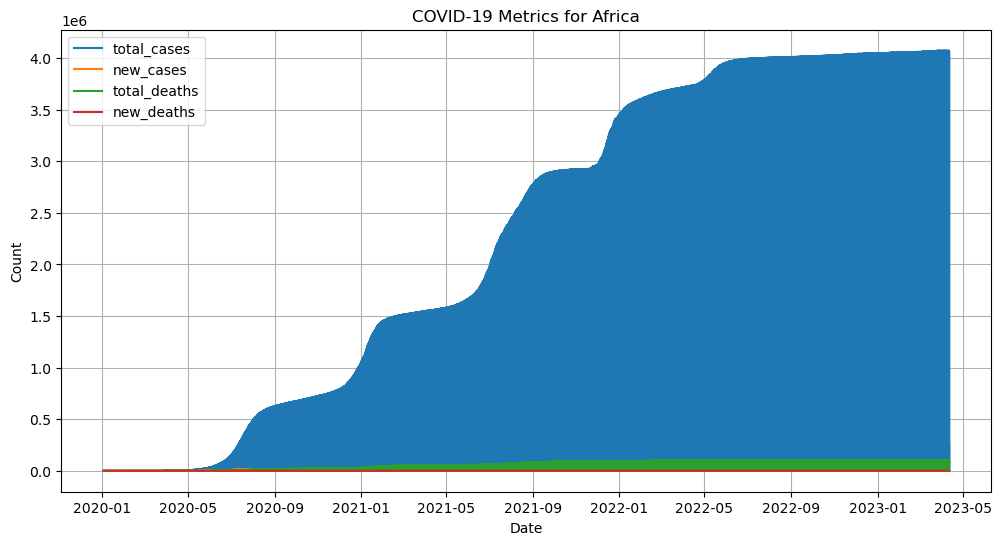

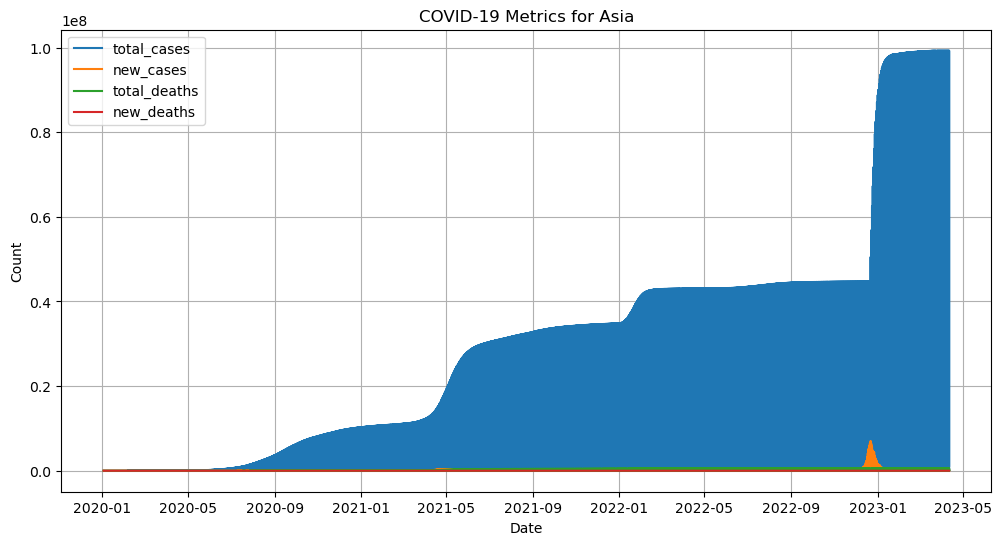

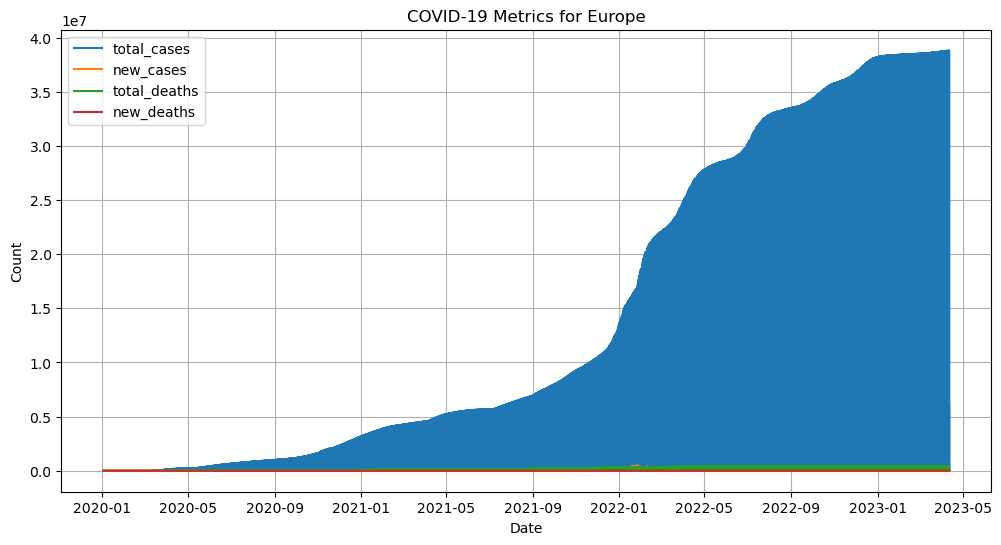

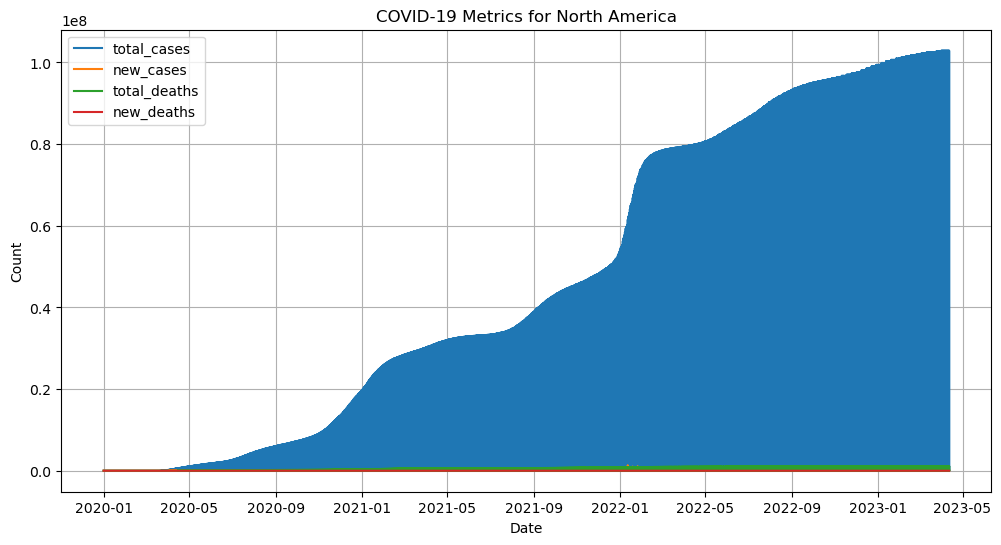

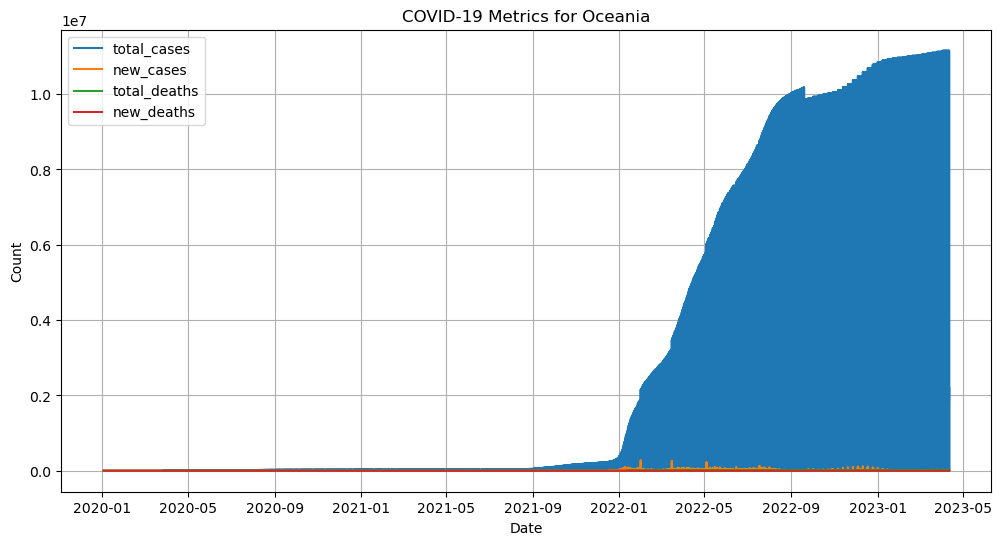

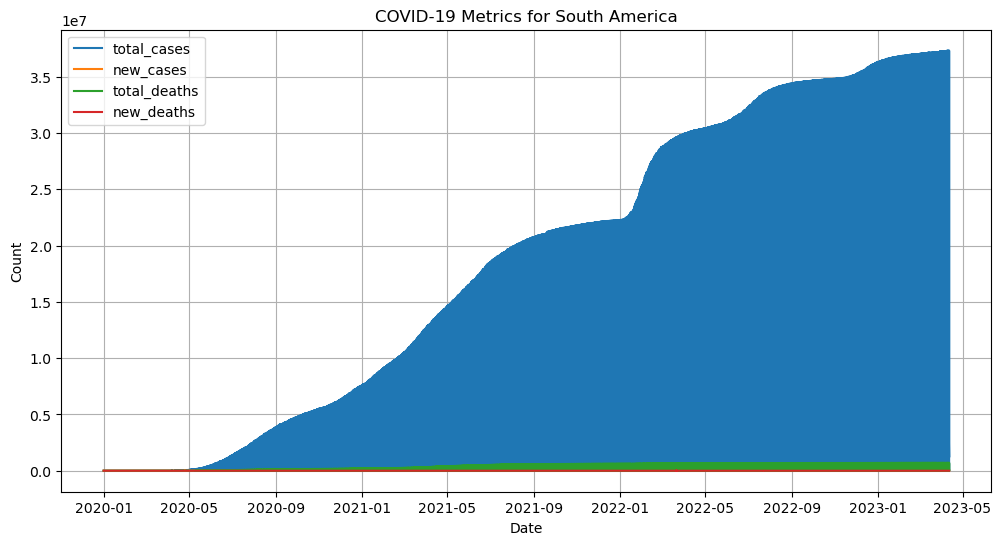

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = ' {:.2f}'.format # set the format for two decimal places
# Convert the 'date' column to a datetime object
country_data_imputed['date'] = pd.to_datetime(country_data_imputed['date'])

# Group the data by 'location'
grouped_data = country_data_imputed.groupby('continent')

# Plot the chart for each unique location
for location, group in grouped_data:
    # Sort data by 'date' for each location
    group = group.sort_values(by='date')

    # Create a line chart for each metric (e.g., 'total_cases', 'new_cases', etc.)
    plt.figure(figsize=(12, 6))
    for column in ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']:
        plt.plot(group['date'], group[column], label=column)

    # Customize the plot
    plt.title(f'COVID-19 Metrics for {location}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
        
    # Display the chart (optional)
    plt.show()
